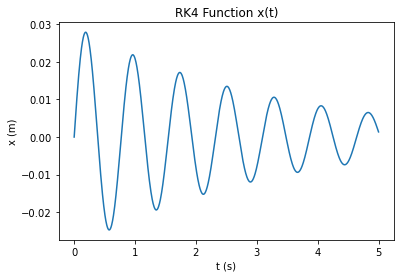

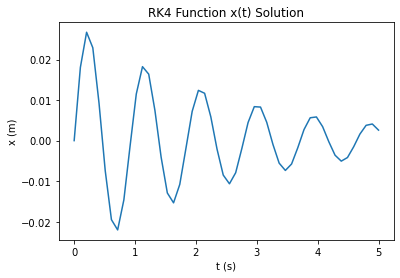

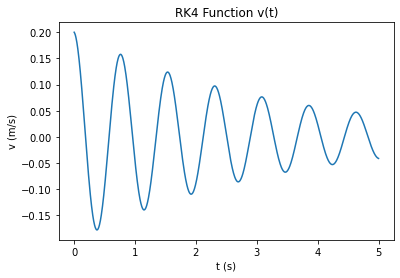

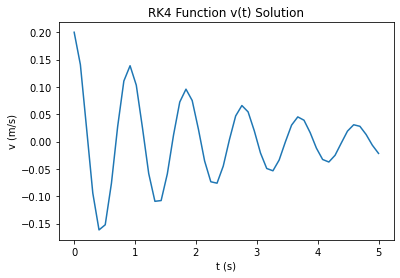

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#Variables
k = 46
gamma = 0.8
m = 1

F_m = lambda t: 0
f_x = lambda t, x, v: v
f_v = lambda t, x, v: F_m(t) - 2 * gamma * v - k * x

t_initial = 0.0
t_final = 5.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 0.0  
v_initial = 0.2  

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k/m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)
DI = x_initial
DII = (v_initial + x_initial * zeta * omega_n) / omega_d


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp

def xu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))
def vu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
    
xu = [xu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]
vu = [vu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]

#Graphs
#x(t)
plot.plot(t, x)
plot.title("RK4 Function x(t)")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()
#x(t) solution
plot.plot(x_t, xu)
plot.title("RK4 Function x(t) Solution")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plot.plot(t, v)
plot.title("RK4 Function v(t)")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()
#v(t) solution
plot.plot(x_t, vu)
plot.title("RK4 Function v(t) Solution")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()

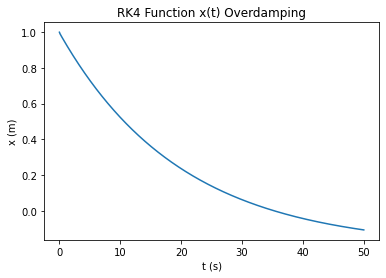

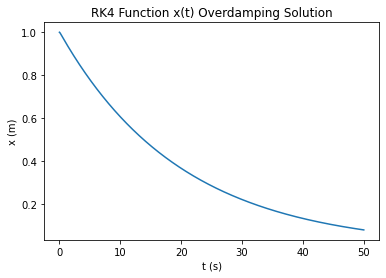

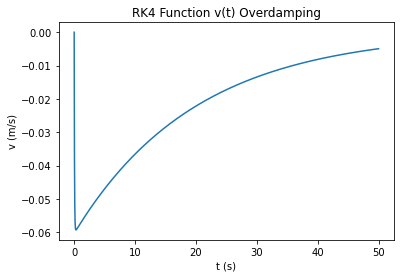

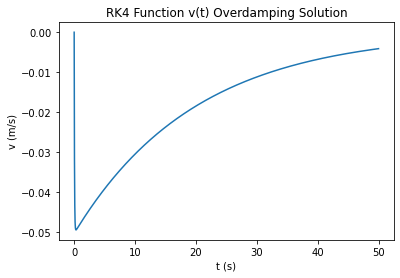

In [2]:
#Overdamping

from math import *
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#Variables
k = 5
gamma = 1
m = 5

f_v = lambda t, x, v: -(lambda_I / (lambda_I - lambda_II) * exp(lambda_I * t)) + (-lambda_II / (lambda_II - lambda_I) * exp(lambda_II * t))
f_x = lambda t, x, v: -1 / (lambda_I - lambda_II) * exp(lambda_I * t) + 1 / (lambda_II - lambda_I) * exp(lambda_II * t)

t_initial = 0.0
t_final = 50.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 1.0
v_initial = 0.0 

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k / m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)

zeta_o = 10
lambda_I = -omega_n * (zeta_o - sqrt(zeta_o ** 2 - 1))
lambda_II = -omega_n * (zeta_o + sqrt(zeta_o ** 2 - 1))

CI_o = (v_initial - x_initial * lambda_II) / (lambda_I - lambda_II)
CII_o = (x_initial * lambda_I - v_initial) / (lambda_I - lambda_II)


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp


def xo_t (CI, CII, lI, lII, t):
    return CI * exp(lI * t) + CII * exp(lII * t)
def vo_t (CI, CII, lI, lII, t):
    return CI * lI * exp(lI * t) + CII * lII * exp(lII * t)

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
    
xo = [xo_t(CI_o, CII_o, lambda_I, lambda_II, tv) for tv in x_t]
vo = [vo_t(CI_o, CII_o, lambda_I, lambda_II, tv) for tv in x_t]

#Graphs
#x(t)
plot.plot(t, x)
plot.title("RK4 Function x(t) Overdamping")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()
#x(t) solution
plot.plot(x_t, xo)
plot.title("RK4 Function x(t) Overdamping Solution")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plot.plot(t, v)
plot.title("RK4 Function v(t) Overdamping")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()
#v(t) solution
plot.plot(x_t, vo)
plot.title("RK4 Function v(t) Overdamping Solution")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()

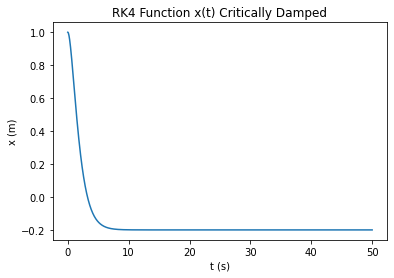

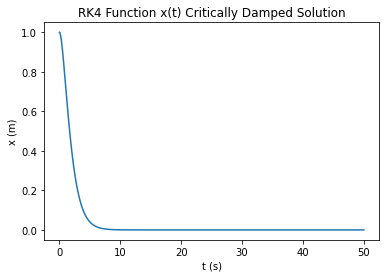

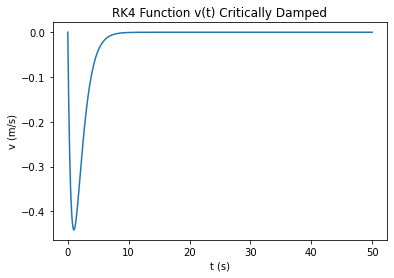

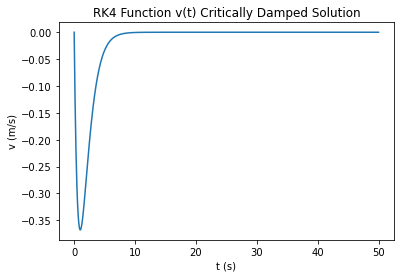

In [3]:
#Critically Damped

from math import *
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#Variables
k = 5
gamma = 1
m = 5

f_v = lambda t, x, v: -CI_c * exp(-omega_n * t) + CII_c * t * exp(-omega_n * t)
f_x = lambda t, x, v: exp(-omega_n * t) * (-omega_n * CI_c + CII_c * (1 - omega_n * t))

t_initial = 0.0
t_final = 50.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 1.0
v_initial = 0.0

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k / m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)

zeta_o = 10
lambda_I = -omega_n * (zeta_o - sqrt(zeta_o ** 2 - 1))
lambda_II = -omega_n * (zeta_o + sqrt(zeta_o ** 2 - 1))

CI_c = x_initial
CII_c = v_initial + omega_n * x_initial


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp


def xc_t (CI, CII, omega_n, t):
    return CI * exp(-omega_n * t) + CII * t * exp(-omega_n * t)

def vc_t (CI, CII, omega_n, t):
    return exp(-omega_n * t) * (-omega_n * CI + CII * (1 - omega_n * t))

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
xc = [xc_t(CI_c, CII_c, omega_n, tv) for tv in x_t]
vc = [vc_t(CI_c, CII_c, omega_n, tv) for tv in x_t]

#Graphs
#x(t)
plot.plot(t, x)
plot.title("RK4 Function x(t) Critically Damped")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()
#x(t) solution
plot.plot(x_t, xc)
plot.title("RK4 Function x(t) Critically Damped Solution")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plot.plot(t, v)
plot.title("RK4 Function v(t) Critically Damped")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()
#v(t) solution
plot.plot(x_t, vc)
plot.title("RK4 Function v(t) Critically Damped Solution")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()

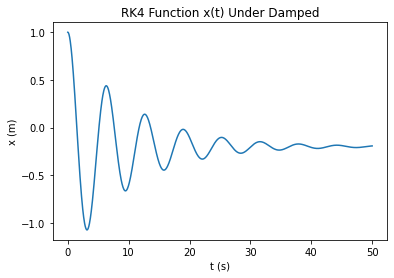

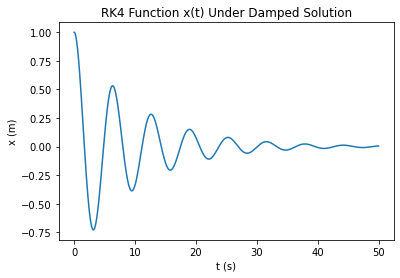

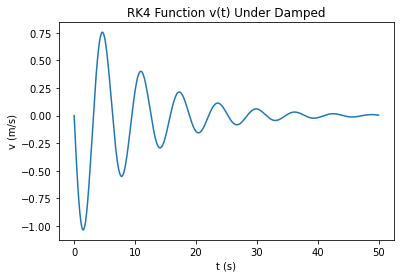

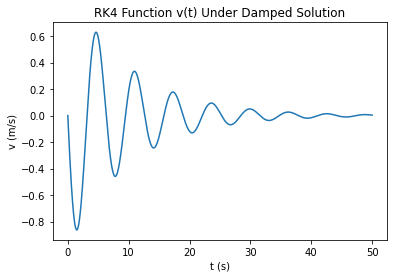

In [4]:
#Underdamping

from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Variables
k = 5
gamma = 1
m = 5

f_v = lambda t, x, v: exp(-zeta * omega_n * t) * (-DI_u * cos(omega_d * t) + DII_u * sin(omega_d * t))
f_x = lambda t, x, v: exp(-zeta * omega_n * t) * (-DI_u * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII_u * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

t_initial = 0.0
t_final = 50.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 1.0
v_initial = 0.0

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k / m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)

zeta_o = 10
lambda_I = -omega_n * (zeta_o - sqrt(zeta_o ** 2 - 1))
lambda_II = -omega_n * (zeta_o + sqrt(zeta_o ** 2 - 1))

DI_u = x_initial
DII_u = (v_initial + x_initial * zeta * omega_n) / omega_d


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp


def xu_t (DI_u, DII_u, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI_u * cos(omega_d * t) + DII_u * sin(omega_d * t))


def vu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI_u * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII_u * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
xu = [xu_t(DI_u, DII_u, zeta, omega_n, omega_d, tv) for tv in x_t]
vu = [vu_t(DI_u, DII_u, zeta, omega_n, omega_d, tv) for tv in x_t]

#Graphs
#x(t)
plt.plot(t, x)
plt.title("RK4 Function x(t) Under Damped")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.show()
#x(t) solution
plot.plot(x_t, xu)
plot.title("RK4 Function x(t) Under Damped Solution")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plt.plot(t, v)
plt.title("RK4 Function v(t) Under Damped")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()
#v(t) solution
plt.plot(x_t,vu)
plt.title("RK4 Function v(t) Under Damped Solution")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.show()

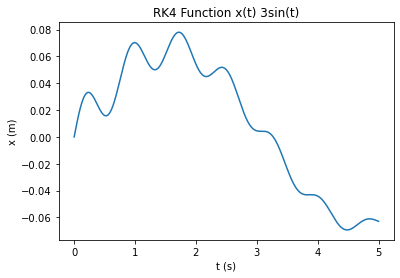

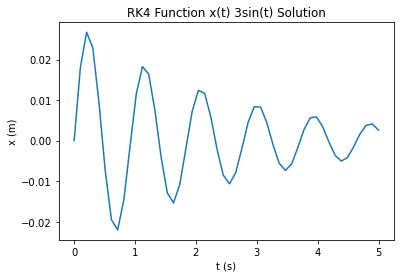

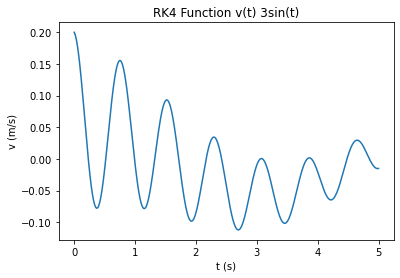

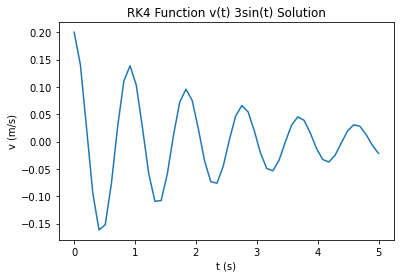

In [5]:
# F(t)/m = 3sin(t)

from math import *
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#Variables
k = 46
gamma = 0.8
m = 1

F_m = lambda t: 3 * sin(t)
f_x = lambda t, x, v: v
f_v = lambda t, x, v: F_m(t) - 2 * gamma * v - k * x

t_initial = 0.0
t_final = 5.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 0.0  # x(0) initial value
v_initial = 0.2  # v(0) initial value

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k / m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)

DI = x_initial
DII = (v_initial + x_initial * zeta * omega_n) / omega_d


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp

def xu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
    
xu = [xu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]
vu = [vu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]

# Plotting Graphs
#x(t)
plot.plot(t, x)
plot.title("RK4 Function x(t) 3sin(t)")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()
#x(t) solution
plot.plot(x_t, xu)
plot.title("RK4 Function x(t) 3sin(t) Solution")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plot.plot(t, v)
plot.title("RK4 Function v(t) 3sin(t)")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()
#v(t) solution
plot.plot(x_t, vu)
plot.title("RK4 Function v(t) 3sin(t) Solution")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()

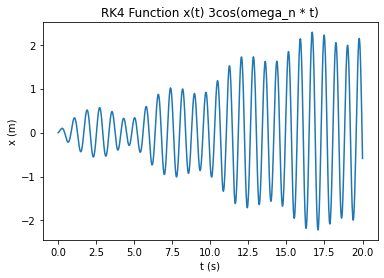

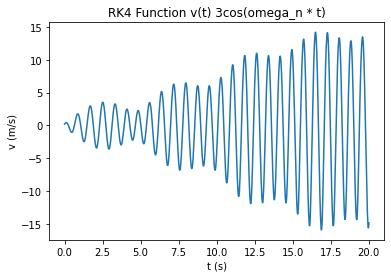

In [8]:
# F(t)/m = 3cos(omega_n*t)

from math import *
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

#Variables
k = 46
gamma = 0.8
m = 1

F_m = lambda t: 3 * cos(omega_n * t)
f_x = lambda t, x, v: v
f_v = lambda t, x, v: F_m(t) - 2 * gamma * v - k * x

t_initial = 0.0
t_final = 20.0
n = 1000

dt = (t_final - t_initial) / (n - 1)
x_t = np.linspace(t_initial, t_final)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)

x_initial = 0.0  # x(0) initial value
v_initial = 0.2  # v(0) initial value

t[0] = t_initial
x[0] = x_initial
v[0] = v_initial

omega_n = sqrt(k / m)
zeta = gamma / (2 * m * omega_n)
omega_d = omega_n * sqrt(1 - zeta ** 2)

DI = x_initial
DII = (v_initial + x_initial * zeta * omega_n) / omega_d


#Function RK4 x
def RK4_x (t_initial, x_initial, v_initial, dt):
    K1 = f_x(t_initial, x_initial, v_initial)
    K2 = f_x(t_initial + 0.5 * dt, x_initial + 0.5 * K1 * dt, v_initial)
    K3 = f_x(t_initial + 0.5 * dt, x_initial * K1 * dt + 0.5 * K2 * dt, v_initial)
    K4 = f_x(t_initial + 1 * dt, x_initial * K1 * dt * K2 * dt + 1 * K3 * dt, v_initial)
    xp = x_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return xp

#Function RK4 v
def RK4_v (t_initial, x_initial, v_initial, dt):
    K1 = f_v(t_initial, x_initial, v_initial)
    K2 = f_v(t_initial + 0.5 * dt, x_initial, v_initial + 0.5 * K1 * dt)
    K3 = f_v(t_initial + 0.5 * dt, x_initial, v_initial * K1 * dt + 0.5 * K2 * dt)
    K4 = f_v(t_initial + 1 * dt, x_initial, v_initial * K1 * dt * K2 * dt + 1 * K3 * dt)
    vp = v_initial + (0.2 * K1 + 0.4 * K2 + 0.4 * K3 + 0.2 * K4) * dt
    return vp

def xu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (DI * cos(omega_d * t) + DII * sin(omega_d * t))

def vu_t (DI, DII, zeta, omega_n, omega_d, t):
    return exp(-zeta * omega_n * t) * (-DI * (omega_d * sin(omega_d * t) + zeta * omega_n * cos(omega_d * t)) + DII * (omega_d * cos(omega_d * t) - zeta * omega_n * sin(omega_d * t)))

for i in range(1, n):
    t[i] = t_initial + i * dt
    x[i] = RK4_x(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = RK4_v(t[i - 1], x[i - 1], v[i - 1], dt)
    
xu = [xu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]
vu = [vu_t(DI, DII, zeta, omega_n, omega_d, tv) for tv in x_t]

# Plotting Graphs
#x(t)
plot.plot(t, x)
plot.title("RK4 Function x(t) 3cos(omega_n * t)")
plot.xlabel("t (s)")
plot.ylabel("x (m)")
plot.show()

#v(t)
plot.plot(t, v)
plot.title("RK4 Function v(t) 3cos(omega_n * t)")
plot.xlabel("t (s)")
plot.ylabel("v (m/s)")
plot.show()
